# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [12]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
}, axis=1, inplace=True)
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: AVG_MATH_4_SCORE

How many years of data are logged in our dataset? 

In [13]:
# df.YEAR.nunique()
df['YEAR'].nunique()

11

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [17]:
ohio = df.where(df['STATE'] == 'OHIO').dropna()['AVG_MATH_4_SCORE'].mean()
michigan = df.where(df['STATE'] == 'MICHIGAN').dropna()['AVG_MATH_4_SCORE'].mean()

print("Michigan" if michigan >= ohio else "Darn, it's Ohio")

Darn, it's Ohio


Find the average for your outcome score across all states in 2019

In [18]:
df.where(df['YEAR'] == 2019).dropna(subset=['YEAR'])['AVG_MATH_4_SCORE'].mean()

239.9433962264151

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [24]:
max_outcome = df.groupby('STATE')['AVG_MATH_4_SCORE'].max().to_dict()
max_outcome

{'ALABAMA': 233.0,
 'ALASKA': 237.0,
 'ARIZONA': 240.0,
 'ARKANSAS': 240.0,
 'CALIFORNIA': 235.0,
 'COLORADO': 247.0,
 'CONNECTICUT': 245.0,
 'DELAWARE': 243.0,
 'DISTRICT_OF_COLUMBIA': 235.0,
 'DODEA': 250.0,
 'FLORIDA': 246.0,
 'GEORGIA': 240.0,
 'HAWAII': 243.0,
 'IDAHO': 242.0,
 'ILLINOIS': 239.0,
 'INDIANA': 249.0,
 'IOWA': 246.0,
 'KANSAS': 248.0,
 'KENTUCKY': 242.0,
 'LOUISIANA': 234.0,
 'MAINE': 246.0,
 'MARYLAND': 247.0,
 'MASSACHUSETTS': 253.0,
 'MICHIGAN': 238.0,
 'MINNESOTA': 253.0,
 'MISSISSIPPI': 241.0,
 'MISSOURI': 241.0,
 'MONTANA': 244.0,
 'NATIONAL': 242.0,
 'NEBRASKA': 246.0,
 'NEVADA': 237.0,
 'NEW_HAMPSHIRE': 253.0,
 'NEW_JERSEY': 249.0,
 'NEW_MEXICO': 233.0,
 'NEW_YORK': 243.0,
 'NORTH_CAROLINA': 245.0,
 'NORTH_DAKOTA': 246.0,
 'OHIO': 246.0,
 'OKLAHOMA': 240.0,
 'OREGON': 240.0,
 'PENNSYLVANIA': 246.0,
 'RHODE_ISLAND': 242.0,
 'SOUTH_CAROLINA': 238.0,
 'SOUTH_DAKOTA': 242.0,
 'TENNESSEE': 241.0,
 'TEXAS': 244.0,
 'UTAH': 244.0,
 'VERMONT': 248.0,
 'VIRGINIA': 248

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [26]:
df['STUDENT_TEACHER_RATIO'] = df['ENROLL_ALL'] / df['NUMBER_OF_TEACHERS']

0       2.025197
2       2.132082
3       2.184247
4       2.732512
5       2.680986
          ...   
1710         NaN
1711         NaN
1712         NaN
1713         NaN
1714         NaN
Length: 521, dtype: float64

Feature engineering justification: **The student-to-teacher ratio is often correlated with academic performance; smaller ratios imply more individualized attention and potentially better support for each student's learning needs**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='AVG_MATH_4_SCORE', ylabel='AVG_MATH_8_SCORE'>

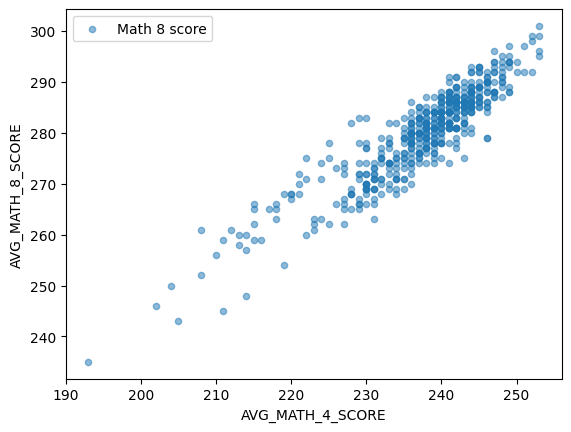

In [33]:
# Scatter plot for AVG_MATH_4_SCORE vs. AVG_MATH_8_SCORE
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.5, label='Math 8 score')

**Plot of average 4th grade math score vs. the average 8th grade math score, displaying a strong correlation as we move up grade levels.**

**Visualization 2**

<Axes: xlabel='AVG_MATH_4_SCORE', ylabel='AVG_READING_8_SCORE'>

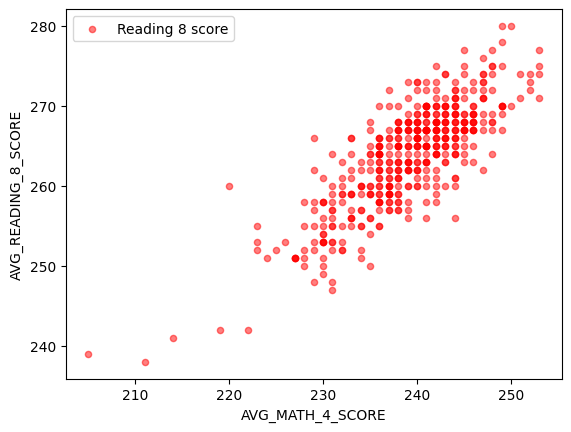

In [32]:
# Scatter plot for AVG_MATH_4_SCORE vs. AVG_READING_8_SCORE (as another predictor)
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_READING_8_SCORE', alpha=0.5, color='red', label='Reading 8 score')

**Plot of average 4th grade math score vs. the average 8th grade reading score, displaying a strong correlation, though not as strong as 4th vs 8th grades math. Skills issue?**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [ ]:
# import your sklearn class here

In [ ]:
# create your model here
# model = 

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR'

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")

In [ ]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**